In [1]:
# 1. 데이터셋 불러오가
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
# 2. feature 분석
# 2-1.
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# 2-2.
titanic.describe()

# 2-3. 
# count: 데이터의 총 개수를 나타냄. 결측값(NaN)을 제외한 유효한 값의 수
# mean: 데이터의 평균값. 모든 값의 합을 데이터 개수로 나눈 값.
# std: 표준편차. 데이터가 평균값을 중심으로 얼마나 퍼져 있는지를 나타내는 지표
# min: 데이터의 최솟값. 데이터셋에서 가장 작은 값
# 25%: 데이터의 하위 25%에 해당하는 값.
# 50%: 중앙값
# 75%: 데이터의 상위 25%에 해당하는 값
# max: 데이터의 최댓값. 데이터셋에서 가장 큰 값

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# 2-4.
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
# 3. feature engineering
# 3-1. 결측치 처리
titanic['age']=titanic['age'].fillna(titanic['age'].median())
titanic['embarked']=titanic['embarked'].fillna(titanic['embarked'].mode()[0])

print(titanic['age'].isnull().sum())
print(titanic['embarked'].isnull().sum())

0
0


In [6]:
# 3-2. 수치형으로 인코딩
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['alive'] = titanic['alive'].map({'no': 1, 'yes': 0})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2,})

print(titanic['sex'].head())
print(titanic['alive'].head())
print(titanic['embarked'].head())

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64
0    1
1    0
2    0
3    0
4    1
Name: alive, dtype: int64
0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int64


In [7]:
# 3-3. 새로운 feature 생성
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

print(titanic['family_size'].head())

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


In [18]:
print(titanic)

     survived  pclass  sex   age  sibsp  parch     fare  embarked  family_size
0           0       3    0  22.0      1      0   7.2500         2            2
1           1       1    1  38.0      1      0  71.2833         0            2
2           1       3    1  26.0      0      0   7.9250         2            1
3           1       1    1  35.0      1      0  53.1000         2            2
4           0       3    0  35.0      0      0   8.0500         2            1
..        ...     ...  ...   ...    ...    ...      ...       ...          ...
886         0       2    0  27.0      0      0  13.0000         2            1
887         1       1    1  19.0      0      0  30.0000         2            1
888         0       3    1  28.0      1      2  23.4500         2            4
889         1       1    0  26.0      0      0  30.0000         0            1
890         0       3    0  32.0      0      0   7.7500         1            1

[891 rows x 9 columns]


In [8]:
# 4. 모델 학습시키기
# 4-1. 모델 학습 준비
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size']]
X = titanic.drop('survived', axis=1) # feature
y = titanic['survived'] # target

In [9]:
# 4-2. Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Confusion Matrix:
[[80 25]
 [16 58]]


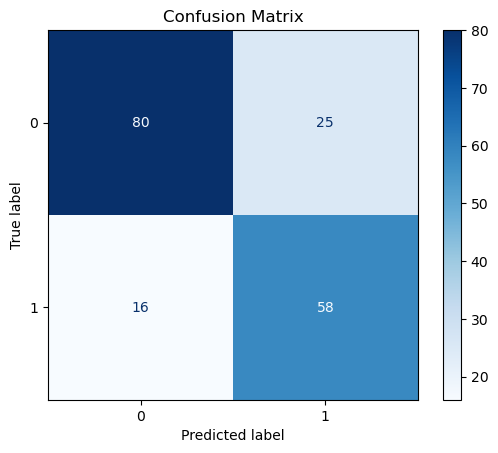

In [17]:
# 혼동 행렬 시각화

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [11]:
# 4-3. Decision Tree

from sklearn.tree import DecisionTreeClassifier

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.770949720670391
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       105
           1       0.70      0.78      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



In [13]:
# 4-4. XGBoost

import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 모델 학습
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost 모델의 MSE: {mse_xgb}')

XGBoost 모델의 MSE: 0.12981004899201257


[[92 13]
 [22 52]]


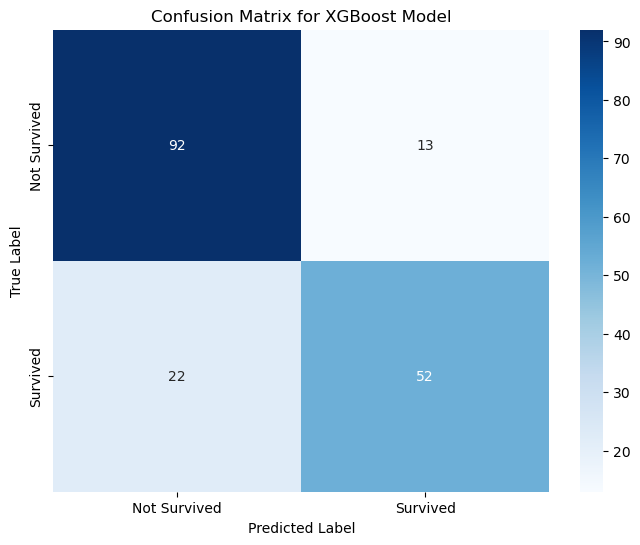

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# XGBoost 모델을 분류기로 변경
from xgboost import XGBClassifier

# 모델 생성 (XGBoost Classifier)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 혼동 행렬 계산
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print(cm_xgb)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Not Survived', 'Survived'], 
             yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


<Figure size 1200x800 with 0 Axes>

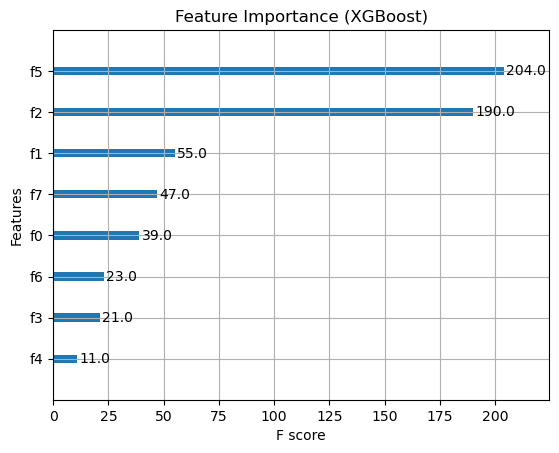

In [20]:
import xgboost as xgb
import matplotlib.pyplot as plt

# xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# xgb_model.fit(X_train_scaled, y_train)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance (XGBoost)')
plt.show()
